<center> <h1><u> Machine Learning - Predictive Modelling & Model Comparison</u></h1></center>

<h3>Group Details: </h3>
<table>
<tbody>
<tr>
<td align = "left"><b>Sr.no</b> &nbsp;</td>
<td align = "left"><b>Name</b> &nbsp;</td>

</tr>
<tr>
<td align = "left">1.&nbsp;</td>
<td align = "left">Aditya Ravindra Dhapola&nbsp;</td>

</tr>
<tr>
<td align = "left">2.&nbsp;</td>
<td align = "left">Pallavi Bhimte&nbsp;</td>

</tr>
<tr>
<td align = "left">3.&nbsp;</td>
<td align = "left">Somya Singhal&nbsp;</td>

</tr>
</tbody>
</table>

<h3>Table of Contents:</h3>

| Sr.no               | Tasks              | Contents        | 
| --------------------|:------------------:|:--------------------|
| 1 |<a href="#1"> Task 1 </a>| Introduction, Report Overview <a href="#1.1">(Task 1.1)</a>, Overview of Methodology<a href="#1.2"> (Task 1.2)</a>|
|2  |<a href="#2"> Task 2 </a>| Predictive Modelling, Feature Selection<a href="#2.1">(Task 2.1)</a>, Model Fitting and Tuning<a href="#2.2">(Task 2.2)</a>, Model Comparison<a href="#2.3">(Task 2.3)</a>|
|3  |<a href="#3"> Task 3 </a>| Critique and Limitations |
|4  |<a href="#4"> Task 4 </a>| Summary and Conclusion, Project Summary<a href="4.1"> (Task 4.1) </a>, Summary of Findings<a href="4.2"> (Task 4.2) </a>, Conclusion <a href="4.1"> (Task 4.3) </a> |
|5  |<a href="#5"> </a>| References |

<h2 id ="1">Task 1 - Introduction</h2>
<p> </p>
    
<h3 id = "1.1">1.1 Report Overview: </h3> 
<p>The main objective of this project is to predict whether a person is likely to experience a stroke or not by using the input parameters/ features as described in the dataset. Also, various machine learning algorithms are applied on the dataset to predict the defined target variable (Stroke). This report mainly demonstrates the use of predictive modelling techniques on the data that was pre-processed in phase 1. It also discusses appropriate performance metrics of individual algorithms and helps in determining the limitations of models as well. Furthermore, the best model amongst all is acquired after observing and comparing the performance of various models.</p>
<p></p>
    
<h3 id = "1.2">1.2 Overview of Methodology:</h3>
<p> Initially, the best descriptive features are selected for the dataset using bi-direction selection for the wrapper method. Five algorithms are applied to predict the possibility of a person getting a stroke, these include Decision-tree, k Nearest Neighbours, Support Vector Machine, Random Forest and Naive Bayes. Then, hyper-parameter fine-tuning is performed for the five models. Lastly, all these models are compared and their critiques and limitations are discussed in detail. Also, with the help of the performance analysis of each algorithm, the best one is selected. Moreover, to reduce class imbalance observed in the columns, SMOTE is used and the performance metrics is again observed and compared for all the models. </p>
</div>

Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
import warnings
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection as fs
warnings.filterwarnings("ignore")

<h4>Data Pre-processing Steps:</h4> 
<p> Few data pre-processing steps were applied to make the data ready for the analysis part. Firstly, an unwanted column "id" is removed from the dataset. Then, the feature variables and target variable are defined for the analysis and stored in x and y respectively. Secondly, one hot encoding is perfomed on the multinomial variables of the stroke prediction dataset. These were mainly gender with categories Male, Female and others work_type categories Govt_job, Never_worked, Private, Self_employed and children and smoking status with Unknown, formerly smoked, never smoked and smokes categories. Thirdly, binary encoding is performed on the binary variables i.e., ever_married and Residence_type both containing entries in form of Yes and No. The transformed data can then be observed from the cell below:</p>

In [2]:
#Read Data
Data = pd.read_csv("healthcare-dataset-stroke-data.csv")

#Drop unwanted column
Data = Data.dropna()
Data = Data.drop(columns=['id'])

#split data into features and target: x and y
x = Data.iloc[:, 0:-1]
y = pd.DataFrame(Data['stroke'])

#Perform one-hot encoding on gender, work_type and smoking_status columns
x = pd.concat([x,pd.get_dummies(x[['gender', 'work_type', 'smoking_status']])],axis=1)
x.drop(['gender', 'work_type', 'smoking_status'],axis=1, inplace=True)

#Perform label encoding on ever_married and Residence_type
def encoding_features(df, feature_name):
    encoding = preprocessing.LabelEncoder()
    name = feature_name
    df[name] = encoding.fit_transform(df[name])
    return (df)

col_names = ['ever_married', 'Residence_type'] #Binary Encoding
for i in col_names:
    encoding_features(x, i)

#Observe the top entries
x.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.6,0,1,0,0,0,1,0,0,0,1,0,0
2,80.0,0,1,1,0,105.92,32.5,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.4,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.0,1,0,0,0,0,0,1,0,0,0,1,0
5,81.0,0,0,1,1,186.21,29.0,0,1,0,0,0,1,0,0,0,1,0,0


<h2 id="2">Task 2 - Predictive Modelling</h2>
<h3 id = "2.1">2.1 Feature Selection:</h3> 
<p> There are three continous features, and seven binary features in the dataset. The target feature heart_disease is a binary target. Since the target varibale is in binary form, this will be a classification problem. The dataset consists of 5110 observations and has total 12 input features. To select the most relevant features that reveal significant information about the models, SelectKBest is used. It estimates the best features with k highest scores. Here, number of features is set to 10 so it returns top 10  best features from the entire dataset. </p>

<p> The selected features after applying SelectKBest were - 'age', 'hypertension', 'avg_glucose_level', 'heart_disease', 'ever_married', 'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'work_type_Self-employed' and 'bmi'. </p>

In [3]:
#Feature Selection
num_features = 10
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(x, y)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

array([ 0,  1,  5,  2,  3, 14, 15, 16, 13,  6], dtype=int64)

In [4]:
best_features_fscore = x.columns[fs_indices_fscore].values
best_features_fscore

array(['age', 'hypertension', 'avg_glucose_level', 'heart_disease',
       'ever_married', 'work_type_children', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'work_type_Self-employed', 'bmi'],
      dtype=object)

In [5]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([279.98091833, 101.72936138,  96.58507202,  95.17556029,
        54.79673431,  32.38421368,  27.76960471,  16.17533519,
        15.08249657,   8.82649999])

In [6]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

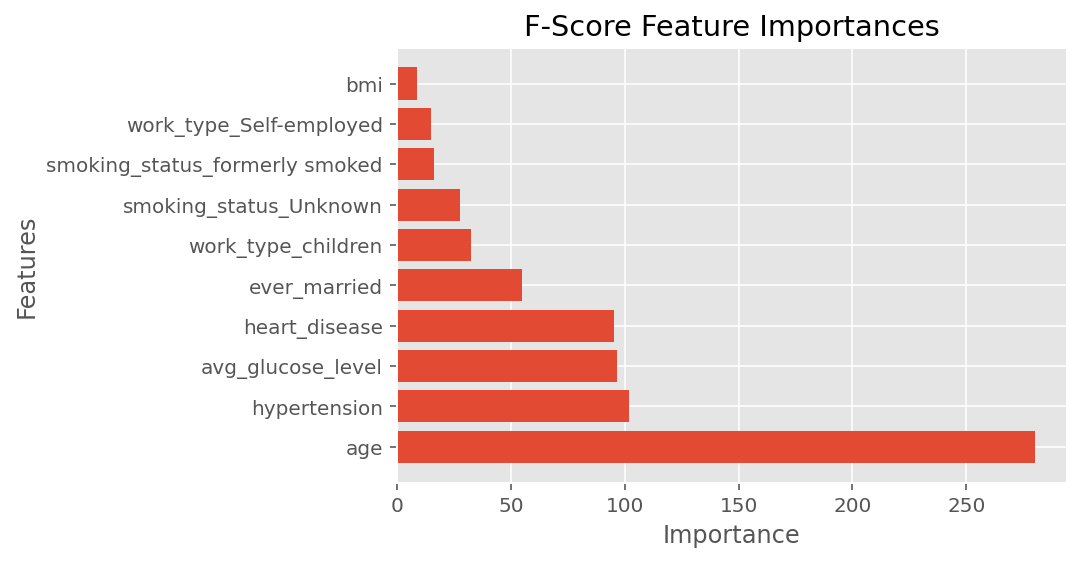

In [7]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

In [8]:
x = x[['age', 'hypertension', 'avg_glucose_level', 'heart_disease',
       'ever_married', 'work_type_children', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'work_type_Self-employed', 'bmi']]

<h3 id = "2.2">2.2 Model Fitting and Tuning:</h3>
<h3 id="2.2.1"> 2.2.1 Model Fitting </h3>
    <p> </p> 

<p> To evaluate the performance of five machine learning algorithms, the data is splitted into train and test data. Here, the predictive modelling problem will be solved after the train-test split procedure for predicting the chances of getting a stroke. The scikit-learn machine learning library is imported to split the data into 70 and 30 percent for the train and test datasets respectively. Using the train dataset, the model will be fitted and with the help of test dataset, evaluation of final machine learning model fit will be thoroughly analysed.</p>
<p> Next, using the standard normal distribution technique that is done by StandardScaler, the mean gets converted to 0 and data is scaled to unit variance. Standard scaling is performed on X_train and X_test simantaneously to scale the and hence, the train and test datasets is transformed accurately. </p>
<p> A new function is created to train all the five models at once. The five machine learning algorithms  include Decision Tree, K-Nearest Neighbors, Support Vector Machine, Random Forest and Naive Bayes. With the help of this function, it would be easier to run all the models together and it would also help in comparing them in a clear and concised manner. </p>

In [9]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state= 999, shuffle = True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
#Define Models
Models = {
    "Decision Tree ": DecisionTreeClassifier(),
    "K-Nearest Neighbors ": KNeighborsClassifier(),
    "Support Vector Machine ": svm.SVC(),
    "Random Forest ": RandomForestClassifier(),    
    "Naive Bayes ":GaussianNB()
}
for name, models in Models.items():
    models.fit(X_train, y_train)
    print(name + "trained")

Decision Tree trained
K-Nearest Neighbors trained
Support Vector Machine trained
Random Forest trained
Naive Bayes trained


To estimate the performance of all these machine learning algorithms on the dataset, the Stratified K-Fold cross-validator is used here. Since the number of splits performed are 10, this will be a Stratified 10-fold cross validation process with 3 combinations i.e., n_repeats is set to 3. The mean response value in this step is nearly equal in all the ten folds. It follows the same process as normal K-Fold cross validation, that is it divides the entire dataset into k subsets. Apart from this, in every iteration, one of the subset is chosen as validation set and other subsets are taken as training sets. The dataset was observed to be an imbalance dataset therefore, it ensures equal percentage of samples for class target with different randomisation in every iteration and hence, the Stratified K-Fold cross-validator was chosen.

In [11]:
#Observe the performance metrics for each model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=999)

print("Model Performance: \n")
for name, model in Models.items():
    y_pred = model.predict(X_test)
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = cv)
    print(name + " Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))
    print('Repeated Stratified K-Fold Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('Precision: {:.2f}'.format(precision))
    print('Recall: {:.2f}'.format(recall), "\n")
    

Model Performance: 

Decision Tree  Accuracy: 91.38 %
Repeated Stratified K-Fold Mean Accuracy: 92.14 %
F1-Score: 0.12
ROC AUC Score: 0.55
Precision: 0.10
Recall: 0.16 

K-Nearest Neighbors  Accuracy: 95.86 %
Repeated Stratified K-Fold Mean Accuracy: 95.22 %
F1-Score: 0.00
ROC AUC Score: 0.50
Precision: 0.00
Recall: 0.00 

Support Vector Machine  Accuracy: 96.13 %
Repeated Stratified K-Fold Mean Accuracy: 95.58 %
F1-Score: 0.00
ROC AUC Score: 0.50
Precision: 0.00
Recall: 0.00 

Random Forest  Accuracy: 95.93 %
Repeated Stratified K-Fold Mean Accuracy: 95.47 %
F1-Score: 0.03
ROC AUC Score: 0.51
Precision: 0.20
Recall: 0.02 

Naive Bayes  Accuracy: 80.92 %
Repeated Stratified K-Fold Mean Accuracy: 77.80 %
F1-Score: 0.18
ROC AUC Score: 0.67
Precision: 0.11
Recall: 0.53 



By looking at the above performance metrics of all models, following points can be interpreted:

* The accuracies for each model was found to be more than 90% except for Naive Bayes. 
* The accuracy after applying repeated stratified 10-Fold cross validation was observed to be above 90% except for the Naive Bayes Model, that was 77.80%. 
* When the F1 score of every model was considered, highest F1 score was observed for Naive Bayes that is 0.18. Second highest was observed for Decision Tree classifier with 0.12  F1 score. For random forest, it was found to be 0.03 whereas for other two models, it was 0.00.
* For K-Nearest Neighbors, and Support-Vector Machine, the ROC AUC curve was interpreted to be 0.50, it was 0.51 and 0.55 for Random Forest and Decsion tree classifiers respectively. The maximum ROC AUC curve value was obtained for naive Bayes.
* The precision value was recorded to be 0.00 for both SVM and K-Nearest Neighbors and for Decision Tree and Naive Bayes were  recorded as 0.10 and 0.11
* Considering the recall value obtained for different models, the maxmimum recall score was 0.53 for Naive Bayes. The recall for K- nearest and SVM model was detected to be 0.00 whereas for random forest and decision tree it got a value of 0.02 and 0.16 respectively.  

From the above results, it could be inferred that Naive Bayes is best amongst all of these since it had maximum F1 score, ROC curve value and recall score as compared to other models. 
The class imbalance in the target variable can be seen in the cell below:

In [12]:
y_train['stroke'].value_counts()

0    3284
1     152
Name: stroke, dtype: int64

From the above output, it is obvious that there exists class imbalance in the data i.e., number of 0 is more than number of 1 in the y_train dataset. Therefore to mitigate this imbalance in the data, Synthetic Minority Oversampling Technique(SMOTE) is applied. Through this oversampling technique, the overfitting will be reduced and synthetic samples can be easily made for the class with less observed values that is 1 here, since it is the minority class. It mainly concentrates on the feature space in order to produce new examples by interpolating between positive instances that are close to each other.

In [13]:
#SMOTE to adjust class imbalance
X_train_smt = X_train.copy()
y_train_smt = y_train.copy()
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train_smt, y_train_smt)

Now after applying SMOTE, the resulting target feature has equal number of entries for both classes in the data that can observed from the cell below:

In [14]:
#Count y_train values
y_train_smt['stroke'].value_counts()

1    3284
0    3284
Name: stroke, dtype: int64

<h3 id = "2.2.2">2.2.2 Model Tuning:</h3> 

<p> For model tuning, GridSearchCV method is used that will help in looping through already define parameter by also fitting the estimator on the training set. The best parameters can then be selected from the hyperparameters passed into it. This method considers all different possible combinations of parameters in an exhaustive way. A grid is defined with all the parameters for their respective models. This makes is easier to excute the models, understand various parameters for individual model. For every model, following parameters were selected and tuned:

* For Decision tree classifier, two criterions are explored: one with gini index and one with entropy for maximum depth varying from 1 to 10.
* In K Nearest Neighbors, model is running with three different metrics, i.e., euclidean, manhattan and minkowski for four different number of neighbors i.e., 5,7, 8 and 10.
* For Support vector machine, cross product of c values ranging from [0.1, 1] and gamma values in [1, 0.1] for kernel rbf.
* In Random Forest classifier, number of estimators passed for gini index and entropy criteria vary within [50, 100].
* For Naive Bayes, variance smoothing parameter is searched over the powers of 10 using logspace function with 100 different values.

In [15]:
#Parameter tuning
grid_search = [(DecisionTreeClassifier(),[{'criterion':['gini','entropy'], 'max_depth': range(1, 10)}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['minkowski', 'manhattan', 'euclidean' ]}]),
               (svm.SVC(),[{'C':[0.1, 1],'gamma':[1, 0.1],'kernel': ['rbf']}]),
               (RandomForestClassifier(),[{'n_estimators':[50, 100],'criterion':['gini','entropy']}]),
               (GaussianNB(), [{'var_smoothing': np.logspace(0,-9, num=100)}])
              ]  

In [16]:
#Performance metrics
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

for l, m in grid_search:
    model_grid = GridSearchCV(estimator= l, param_grid = m, scoring = 'accuracy', cv = cv)
    model_grid.fit(X_train_smt, y_train_smt)
    y_pred_tuned = model_grid.predict(X_test)
    roc_tuned = roc_auc_score(y_test, y_pred_tuned)  
    accuracies1 = cross_val_score(estimator = model_grid, X = X_train_smt, y = y_train_smt, cv = 10)#ROC AUC Score
    print("\n", l)
    print("Best Parameter: ", model_grid.best_params_)
    print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_tuned), 2) * 100) + " %")
    print('Repeated Stratified K-Fold Mean Accuracy: {:.2f} %'.format(accuracies1.mean()*100))
    print('F1 Score : ' + str(round(f1_score(y_test,y_pred_tuned), 2)))
    print('ROC AUC Score: {:.2f}'.format(roc_tuned))
    print('Precision Score : ' + str(round(precision_score(y_test,y_pred_tuned), 2)))
    print('Recall Score : ' + str(round(recall_score(y_test,y_pred_tuned), 2)))



 DecisionTreeClassifier()
Best Parameter:  {'criterion': 'gini', 'max_depth': 9}
Accuracy Score : 67.0 %
Repeated Stratified K-Fold Mean Accuracy: 84.14 %
F1 Score : 0.14
ROC AUC Score: 0.67
Precision Score : 0.08
Recall Score : 0.67

 KNeighborsClassifier()
Best Parameter:  {'metric': 'manhattan', 'n_neighbors': 5}
Accuracy Score : 82.0 %
Repeated Stratified K-Fold Mean Accuracy: 89.54 %
F1 Score : 0.15
ROC AUC Score: 0.62
Precision Score : 0.09
Recall Score : 0.4

 SVC()
Best Parameter:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy Score : 83.0 %
Repeated Stratified K-Fold Mean Accuracy: 89.17 %
F1 Score : 0.15
ROC AUC Score: 0.62
Precision Score : 0.09
Recall Score : 0.39

 RandomForestClassifier()
Best Parameter:  {'criterion': 'gini', 'n_estimators': 100}
Accuracy Score : 67.0 %
Repeated Stratified K-Fold Mean Accuracy: 93.64 %
F1 Score : 0.12
ROC AUC Score: 0.63
Precision Score : 0.07
Recall Score : 0.58

 GaussianNB()
Best Parameter:  {'var_smoothing': 0.657933224657568}
Accu

<p> <b style = "color: red">* Note:</b> <b><i> SVM takes 115 minutes to run </i></b></p>

After watching the above results, following points could be deduced:

* The best accuracy was observed for Support vector machine that is 83.0% and lowest was for Random forest and Decision tree whereas Gaussian Naive Bayes is recorded as 71.0%.
* If repeated stratified k-fold cross validation mean accuracy is considered, highest accuracy was obtained by random forest classifier(93.64%) and lowest accuracy was for Naive Bayes(76.99%).
* After examining the F1 score for all classifiers, it could be inferred that Gaussian Naive and K-Nearest Neighbors recevied the highest score of 0.15 and 0.16 respectively whereas Decision Tree got a minimum score of 0.14.
* Looking at the ROC AUC curve value, Gaussian Naive had the highest score(0.71) and Decision Tree was the second highest(0.67) amongst all. Again, SVM and KNN got the lowest ROC AUC score of 0.62.
* A precision value of 0.09 was observed to be same for SVM, KNN AND Gaussian Naive, random forest got a score of 0.07. Also, decision tree got precision value of 0.08.

In [34]:
best_param_roc_clas = [DecisionTreeClassifier(criterion='gini', max_depth= 9),
               KNeighborsClassifier(n_neighbors=5, metric='manhattan'),
               RandomForestClassifier(criterion='gini', n_estimators= 100),
               GaussianNB(var_smoothing = 0.8111308307896871),              
               svm.SVC(C= 1, gamma = 1, kernel= 'rbf', probability=True)]

table = pd.DataFrame(columns=['Classifier Name', 'CLS_FPR','CLS_TPR','AUC'])

for x in best_param_roc_clas:
    model_name = x.fit(X_train_smt, y_train_smt)
    y_proba = model_name.predict_proba(X_test)[::,1]    
    
    fpr, tpr, _ = roc_curve(y_test,  y_proba)
    auc = roc_auc_score(y_test, y_proba)    
    table = table.append({'Classifier Name':x.__class__.__name__, 'CLS_FPR':fpr, 'CLS_TPR':tpr, 'AUC':auc}, ignore_index=True)

table.set_index('Classifier Name', inplace=True)

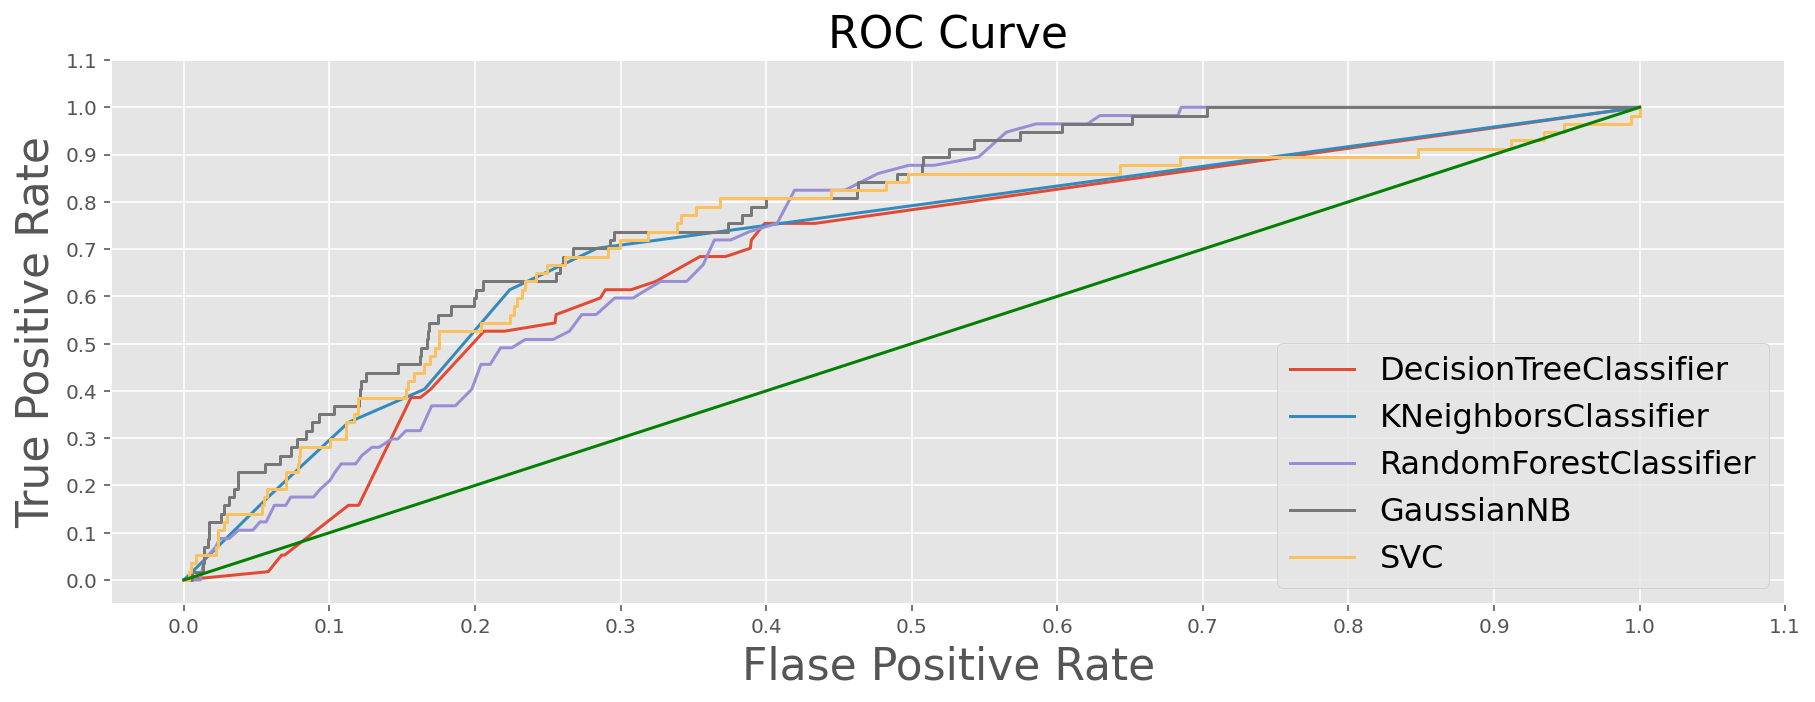

In [35]:
fig = plt.figure(figsize=(15,5))

for i in table.index:
    plt.plot(table.loc[i]['CLS_FPR'], 
             table.loc[i]['CLS_TPR'], 
             label="{}".format(i))
    
plt.plot([0,1], [0,1], color='green', linestyle='-')

a = np.arange(0.0, 1.2, step=0.1)
plt.xticks(a)
plt.xlabel("Flase Positive Rate", fontsize=22)

plt.yticks(a)
plt.ylabel("True Positive Rate", fontsize=22)

plt.title('ROC Curve', fontsize=22)
plt.legend(prop={'size':16}, loc='lower right')

plt.show()

<h3 id = "2.3">2.3 Model Comparison:</h3> 

Using the selected best parameters we are performing Paired-T-Test in order to compare the models and also to identify the statistically best performing algorithm

In [52]:
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=5,random_state=999)

DT = cross_val_score(estimator=DecisionTreeClassifier(criterion='gini', max_depth= 9),
                                 X=X_train_smt,
                                 y=y_train_smt, 
                                 cv=cv, 
                                 n_jobs=-2,
                                 scoring='roc_auc')

KNN = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=5, metric='manhattan'),
                                 X=X_train_smt,
                                 y=y_train_smt, 
                                 cv=cv, 
                                 n_jobs=-2,
                                 scoring='roc_auc')

RandomForest = cross_val_score(estimator=RandomForestClassifier(criterion='gini', n_estimators= 100),
                                 X=X_train_smt,
                                 y=y_train_smt, 
                                 cv=cv, 
                                 n_jobs=-2,
                                 scoring='roc_auc')

NB = cross_val_score(estimator=GaussianNB(var_smoothing = 0.8111308307896871),
                                 X=X_train_smt,
                                 y=y_train_smt, 
                                 cv=cv, 
                                 n_jobs=-2,
                                 scoring='roc_auc')

SVM = cross_val_score(estimator=svm.SVC(C= 1, gamma = 1, kernel= 'rbf', probability=True),
                                 X=X_train_smt,
                                 y=y_train_smt, 
                                 cv=cv, 
                                 n_jobs=-2,
                                 scoring='roc_auc')

In [54]:
from scipy import stats

print("Decision Tree: ", DT.mean())
print('KNN: ', KNN.mean())
print("Random Forest: ", RandomForest.mean())
print("SVM: ", SVM.mean())
print("NB: ", SVM.mean())

print("Paired T-Test \n")
print("Random Forest and SVM:", stats.ttest_rel(RandomForest, SVM).pvalue)
print("Random Forest and KNN:", stats.ttest_rel(RandomForest, KNN).pvalue)
print("SVM and KNN:", stats.ttest_rel(SVM, KNN).pvalue)

Decision Tree:  0.9000854642991604
KNN:  0.9509124415478949
Random Forest:  0.9830959669467215
SVM:  0.9491846537009604
NB:  0.9491846537009604
Paired T-Test 

Random Forest and SVM: 2.34030732126172e-18
Random Forest and KNN: 1.25263945034491e-21
SVM and KNN: 0.1505667001367487


Below are the two tables to compare the normal performance metrics with the performance metrics of models after treating class imbalance based on their accuracy, ROC AUC value, precision, F1 score, stratified k-fold accuracy and recall score:

<h3>Normal Performance Metrics: </h3>
<table>
<tbody>
<tr>
    <td align = "left"><b>S. No.</b> &nbsp;</td>
    <td align = "left"><b>Models</b> &nbsp;</td>
    <td align = "left"><b>Accuracy</b> &nbsp;</td>
    <td align = "left"><b>ROC AUC value </b>&nbsp;</td>
    <td align = "left"><b>Precision</b>&nbsp;</td>
    <td align = "left"><b>F1 Score</b>&nbsp;</td>
    <td align = "left"><b>Stratified K-Fold Accuracy</b>&nbsp;</td>
    <td align = "left"><b>Recall</b>&nbsp;</td>
</tr>
<tr>
    <td align = "left">1. &nbsp;</td>
    <td align = "left"> Decision Tree&nbsp;</td>
    <td align = "left"> 91.38 &nbsp;</td>
    <td align = "left">0.55 &nbsp;</td>
    <td align = "left"> 0.10 &nbsp;</td>
    <td align = "left">0.12 &nbsp;</td>
    <td align = "left">92.14 &nbsp;</td>
    <td align = "left">0.16 &nbsp;</td>
</tr>
<tr>
    <td align = "left">2. &nbsp;</td>
    <td align = "left"> K-Nearest Neighbors&nbsp;</td>
    <td align = "left"> 95.86 &nbsp;</td>
    <td align = "left"> 0.50 &nbsp;</td>
    <td align = "left"> 0.00 &nbsp;</td>
    <td align = "left"> 0.00 &nbsp;</td>
    <td align = "left">95.22 &nbsp;</td>
    <td align = "left">0.00 &nbsp;</td>
</tr>
<tr>
    <td align = "left">3. &nbsp;</td>
    <td align = "left"> Support Vector Machine&nbsp;</td>
    <td align = "left"> 96.13 &nbsp;</td>
    <td align = "left"> 0.50 &nbsp;</td>
    <td align = "left"> 0.00 &nbsp;</td>
    <td align = "left"> 0.00 &nbsp;</td>
    <td align = "left">95.58 &nbsp;</td>
    <td align = "left">0.00 &nbsp;</td>
</tr>    
<tr>
    <td align = "left">4. &nbsp;</td>
    <td align = "left"> Random Forest&nbsp;</td>
    <td align = "left"> 95.93 &nbsp;</td>
    <td align = "left"> 0.51 &nbsp;</td>
    <td align = "left"> 0.20 &nbsp;</td>
    <td align = "left"> 0.03 &nbsp;</td>
    <td align = "left">95.47 &nbsp;</td>
    <td align = "left">0.02 &nbsp;</td>
</tr>
<tr>
    <td align = "left">5. &nbsp;</td>
    <td align = "left"> Naive Bayes&nbsp;</td>
    <td align = "left"> 80.92 &nbsp;</td>
    <td align = "left"> 0.67 &nbsp;</td>
    <td align = "left"> 0.11 &nbsp;</td>
    <td align = "left"> 0.18 &nbsp;</td>
    <td align = "left">77.80 &nbsp;</td>
    <td align = "left">0.53 &nbsp;</td>
</tr>
</tbody>
</table>

When the normal performance metrics is observed, Naive Bayes model was found to be the most effective one to predict whether a person will be getting a stroke or not. Since it had highest F1 score, ROC curve value and recall score amongst all the other models, this model was selected to be the best one. Though the accuracies of other models were greater than that of Naive Bayes, it was still considerably good enough for the prediction and other resulting performance metric scores could not be ignored. 

<h3>After treating class imbalance (using SMOTE): </h3>
<table>
<tbody>
<tr>
    <td align = "left"><b> S. No. </b>&nbsp;</td>
    <td align = "left"><b>Models</b> &nbsp;</td>
    <td align = "left"><b>Accuracy</b> &nbsp;</td>
    <td align = "left"><b>ROC AUC value </b>&nbsp;</td>
    <td align = "left"><b>Precision</b>&nbsp;</td>
    <td align = "left"><b>F1 Score</b>&nbsp;</td>
    <td align = "left"><b>Stratified K-Fold Accuracy</b>&nbsp;</td>
    <td align = "left"><b>Recall</b>&nbsp;</td>
</tr>
<tr>
    <td align = "left">1. &nbsp;</td>
    <td align = "left"> Decision Tree&nbsp;</td>
    <td align = "left"> 67.0 &nbsp;</td>
    <td align = "left"> 0.67 &nbsp;</td>
    <td align = "left"> 0.08 &nbsp;</td>
    <td align = "left"> 0.14 &nbsp;</td>
    <td align = "left"> 84.14 &nbsp;</td>
    <td align = "left"> 0.67 &nbsp;</td>
</tr>
<tr>
    <td align = "left">2. &nbsp;</td>
    <td align = "left">K-Nearest Neighbors&nbsp;</td>
    <td align = "left"> 82.0 &nbsp;</td>
    <td align = "left"> 0.62 &nbsp;</td>
    <td align = "left"> 0.09 &nbsp;</td>
    <td align = "left"> 0.15 &nbsp;</td>
    <td align = "left"> 89.54 &nbsp;</td>
    <td align = "left"> 0.4 &nbsp;</td>
</tr>
<tr>
    <td align = "left">3. &nbsp;</td>
    <td align = "left"> Support Vector Machine&nbsp;</td>
    <td align = "left"> 83.0 &nbsp;</td>
    <td align = "left"> 0.62 &nbsp;</td>
    <td align = "left"> 0.09 &nbsp;</td>
    <td align = "left"> 0.15 &nbsp;</td>
    <td align = "left"> 89.17 &nbsp;</td>
    <td align = "left"> 0.39 &nbsp;</td>
</tr>    
<tr>
    <td align = "left">4. &nbsp;</td>
    <td align = "left"> Random Forest&nbsp;</td>
    <td align = "left"> 67 &nbsp;</td>
    <td align = "left"> 0.63 &nbsp;</td>
    <td align = "left"> 0.07 &nbsp;</td>
    <td align = "left"> 0.12 &nbsp;</td>
    <td align = "left"> 93.64 &nbsp;</td>
    <td align = "left"> 0.58 &nbsp;</td>
</tr>
<tr>
    <td align = "left">5. &nbsp;</td>
    <td align = "left"> Naive Bayes&nbsp;</td>
    <td align = "left"> 71.0 &nbsp;</td>
    <td align = "left"> 0.71 &nbsp;</td>
    <td align = "left"> 0.09 &nbsp;</td>
    <td align = "left"> 0.16 &nbsp;</td>
    <td align = "left"> 76.99 &nbsp;</td>
    <td align = "left"> 0.7 &nbsp;</td>
</tr>
</tbody>
</table>

While considering the results obtained after treating class imbalance with the help of SMOTE and tuning the model, it could be inferred that Naive Bayes was the best model amongst all due to its high ROC AUC value, precision and F1 score. Second best model that can be attained by looking at the above table was found to be Decision Tree with its second highest F1 score and ROC curve.

Therefore, after comparing all the models, it could be said that Decision Tree and Naive Bayes were the best models for predicting the possibility of getting a stroke.

<h3 id="3">Task 3 - Critique & Limitations:</h3>
<h4>3.1 Strengths of the approach used:</h4>

The approach used for the predictive modelling performed in this project had following strengths:

* Using the SelectKBest method, best features of the model could be easily determined
* A new function is created to train all the models at once making it concise and clear
* Best parameters are easily obtained using the GridSearchCV 
* Class imbalance is removed using oversampling technique
* Best values from the performance metrics were detected and checked
* Easily best models were then determined using the obtained results

<h4>3.2 Weakness of the approach used:</h4>

* All the parameters were not used for tuning the model, only the specific best ones were used

<h4>3.3 Strengths of the best models:</h4>

1. Decision Tree: After choosing the best parameters, i.e., gini index criterion and maximum depth of 9, best ROC AUC curve value, precision and F1 scores were obtained. It was easily able to handle continous and categorical variables and successfully completed predictive modelling without major computation. Also, it was easily prepared, read, and interpreted.
2. Naive Bayes: With variance smoothing of 0.811, maximum of ROC AUC curve and recall values were obtained for this model. It was good at handling discrete and continous data. It could easily interpret the results for predicting stroke.


<h4>3.3 Weaknesses of poor models:</h4>

1. K-Nearest Neighbors: Even after getting the second highest accuracy amongst all models, it was seen that ROC AUC curve and recall scores was comparatively low. Prediction might be slow and needs high memory.
2. Random Forest: It could be considered a good model with strong ROC AUC curve and F1 score values, but when compared to all models, it was not good enough for prediction. It cannot predict beyond a particular range in training dataset and can also overfit the data.
3. Support Vector Machine: Though it got maximum accuracy, it was still not able to predict the target feature well due to its poor F1 score. It took maximum time to run and was not suitable for a large dataset.



<h3 id="4">Task 4 - Summary & Conclusions:</h3>
<h3 id = "4.1">4.1 Project Summary:</h3> 

The following points could be summarised for the project:

* Data transformation with help of one hot encoding and label encoding 
* Feature selection methods to select the best descriptive features from all the features of the dataset 
* Model fitting using five algorithms namely, decision tree, k-nearest neighbors, support vector machine, random forest and naive bayes classfiers
* Model tuning using grid search approach 
* Model comparison by running t-test on the model to select the appropriate one amongst all. Also, selecting the best model before and after treatment of class imbalance based on various factors and scores acquired from the performance metrics of every model. 

This project also discussed the limitations of various algorithms that were not suitable for predicting stroke.

<h3 id = "4.2">4.2 Summary of Findings:</h3> 

* Best descriptive features of the stroke prediction dataset were 'age', 'hypertension', 'avg_glucose_level', 'heart_disease', 'ever_married', 'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'work_type_Self-employed' and 'bmi'.
* After model fitting, Naive Bayes was determined to be the best model for prediction of stroke based on the results obtained in the performance metrics.
* There was class imbalance observed in the target variable which was removed using SMOTE
* Thereafter, using grid search method, model was finely tuned with selecting the best parameters by looping through different possible combination of parameters. The best parameters obtained were:
    1. DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 9}
    2. KNeighborsClassifier: (n_neighbors=5, metric='manhattan')               
    3. RandomForestClassifier: (criterion='gini', n_estimators= 100)               
    4. GaussianNB: (var_smoothing = 0.8111308307896871)
    5. svm.SVC: (C= 1, gamma = 1, kernel= 'rbf', probability=True)
* By running t-test on all five models, the best one was found to be of SVM and KNN where the P-Value is recorded as 0.1505667001367487
* In model comparison, Naive Bayes and Decision tree classifiers were selected as the best ones

<h3 id = "4.3">4.3 Conclusion:</h3>
<p>After comparing all the models on the basis of their overall accuracy, stratified k-fold accuracy, ROC curve value, precision, recall, and F1 scores obtained from the performance metrics of every model, it can be concluded that Decision Tree and Naive Bayes were the best classifiers amongst all to predict the whether a person will be experiencing a stroke or not. These models got high F1-score, precision and ROC AUC curve values as compared to SVM, Random forest and K Nearest Neighbors classifier. It had low but good accuracy score when compared to other classifiers but these were still selected as the best due to its highest f-score value amongst all. </p>

<h3 id="5">References:</h3>
<p>www.kaggle.com. (n.d.).<i>Stroke Prediction Dataset.</i><br>Https://Www.Kaggle.Com/Fedesoriano/Stroke-Prediction-Dataset. Retrieved March 31, 2021, from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset</p>